<a href="https://colab.research.google.com/github/hoanglocbk/NF_Prj_MIMII_Dataset/blob/master/extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hoanglocbk/NF_Prj_MIMII_Dataset.git ./MIMII 
                                                      
import sys
sys.path.append("/content/MIMII/") 

from MIMII import utility

Cloning into './MIMII'...
remote: Enumerating objects: 334, done.
remote: Counting objects: 100% (334/334), done.
remote: Compressing objects: 100% (249/249), done.
remote: Total 2017 (delta 173), reused 204 (delta 83), pack-reused 1683
Receiving objects: 100% (2017/2017), 174.53 MiB | 26.17 MiB/s, done.
Resolving deltas: 100% (1213/1213), done.


In [3]:

#===============================================
# Basic Imports
BASE_FOLDER = './'
TARGET_FOLDER_FE = r'/dataset/extdia_v1_essential' # output folder for ffeat. extraction
# import the repo-local utility py files
%run -i 'utility/feature_extractor/JupyterLoad_feature_extractor.py'
%run -i 'utility/modeling/JupyterLoad_modeling.py'


# feature extraction diagram
%run -i 'feature_extraction_diagrams/extdia_v1_essential.py'
%run -i 'utility/extractor_batch.py'

# helper
from tqdm.auto import tqdm
import glob
import gc

# sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA

feat_ext_folder = os.path.abspath(BASE_FOLDER + TARGET_FOLDER_FE)

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation
load load_data
Load split_data
Load anomaly_detection_models
Load pseudo_supervised_models
Load tensorflow models
Load detection_pipe
load # extractor diagram V1 essential
load extractor_batch


In [ ]:
#===============================================
# Possible variations
# 
# SNRs = ['6dB', '0dB', 'min6dB']
# machines = ['pump', 'valve', 'fan', 'slider']
# IDs = ['00', '02', '04', '06']

SNRs = ['6dB', 'min6dB']
machines = ['pump']
IDs = ['04', '06']

# if we want to include augmented model (SVM) set True
aug = True

# note: increase n_jobs to max. CPUs you have use all hyperthreading cores (there is no auto detect just now)
n_jobs = 1

In [ ]:
def feat_ext_process_set(FileFindDict, main_channel=0, sporadic=False, augment=False,FileCountLimit=None, n_jobs=1):
    
    if sporadic:
        dt = 1 # 1 means time slicing 
    else:
        dt = 0
        
    if augment:
        ag = 0 # augment only normal operation
    else:
        ag = -2 # not existing class = no augment
        
    extractor_batch(base_folder= BASE_FOLDER, 
                    target_folder=TARGET_FOLDER_FE, 
                    extdia = extdia_v1_essential, 
                    FileFindDict = FileFindDict,
                    n_jobs = n_jobs,
                    target_class_map = {'abnormal':1, 'normal': 0},
                    FileCountLimit = FileCountLimit,
                    datset_folder_from_base = 'dataset',
                    fHP=120,
                    DeviceType=dt,
                    main_channel = main_channel,
                    augment=ag)
    
    gc.collect()

In [ ]:
def find_data_file(SNR, machine, ID):
    '''
    Function to find existing feature data files.
    If one is found, it returns the path.
    Multiple files will raise error.
    '''
    print(machine)
    # list all the files that match the mask
    path = glob.glob(BASE_FOLDER 
              + '/dataset/extdia_v1_essential/{}{}{}_EDiaV1HP'.format(machine, SNR, ID) 
              + "*pandaDisc*.pkl", recursive=True)
    print(path)
    
    if len(path) == 0:
        return None
    elif len(path) == 1:
        return path[0]
    else:
        raise Exception('More than one file found:', path)

In [ ]:
 find_data_file('6dB', 'pump', '02')

pump
[]


In [ ]:
if not find_data_file('6dB', 'pump', '02'):
    ExampleFileFilter = {'SNR': ['6dB'],'machine': ['pump'],'ID': ['02']}
    # create some 
    feat_ext_process_set(ExampleFileFilter,
                        main_channel=2,
                        sporadic = False,
                        augment = True,
                        FileCountLimit= None,
                        n_jobs=n_jobs)

INFO:feature_extraction_batch:2021-01-11 12:24:00: Target folder will be: /content/MIMII/dataset/extdia_v1_essential
INFO:feature_extraction_batch:2021-01-11 12:24:00: Extractor diagram is fof type: <class '__main__.extdia_v1_essential'>
INFO:feature_extraction_batch:2021-01-11 12:24:00: --------------------------------------------
INFO:feature_extraction_batch:2021-01-11 12:24:00: Working on machinepart:pump SNR:6dB ID:02
INFO:feature_extraction_batch:2021-01-11 12:24:00: Files to process: 0


pump
[]
2021-01-11 12:24:00: Target folder will be: /content/MIMII/dataset/extdia_v1_essential
2021-01-11 12:24:00: Extractor diagram is fof type: <class '__main__.extdia_v1_essential'>
2021-01-11 12:24:00: --------------------------------------------
2021-01-11 12:24:00: Working on machinepart:pump SNR:6dB ID:02
2021-01-11 12:24:00: Files to process: 0


KeyError: ignored

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation


'denoised'

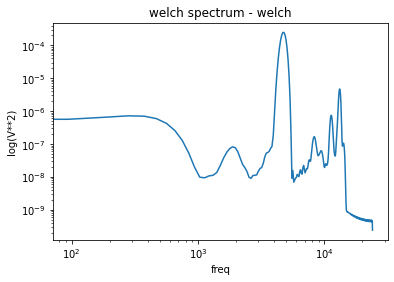

'original'

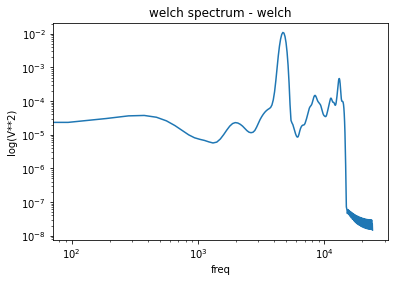

In [5]:
from IPython.display import display, Audio
BASE_FOLDER = './'
%run -i utility/feature_extractor/JupyterLoad_feature_extractor.py
#-- test
file_path = r'/dataset/normal_78328.t.mp3'
nnF = feature_extractor_pre_nnFilterDenoise(BASE_FOLDER)
nnF.set_hyperparamter(aggregation=np.mean)
nnF.create_from_wav(file_path)
wmf = nnF.get_wav_memory_file()
display('denoised')
display(Audio(data=wmf.channel[0],rate=wmf.srate))
psd = feature_extractor_welchPSD(BASE_FOLDER)
psd.create_from_wav(wmf)
psd.plot()
plt.show()
af = librosa.load(os.path.abspath(BASE_FOLDER+file_path), sr=None, mono=False)
display('original')
display(Audio(data=af[0][0],rate=wmf.srate))
psd.create_from_wav(file_path)
psd.plot()
plt.show()

IndexError: ignored

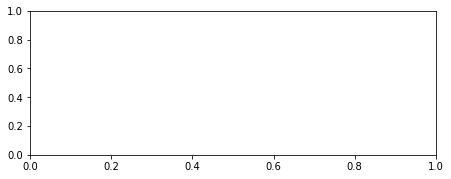

In [ ]:

# This code reloads pkl files that have been stored
# in the step above - notice only created files can be loaded
# then a plot is made form n and n+1 output ports
# this cell is ment as a spot check before running the batch that might,
# take much more time !

d_MEL_den = pickle.load( open( feat_ext_folder + r'/pump6dB02_EDiaV1HPaug0_outpMEL_den.pkl', "rb" ))
d_MEL_raw = pickle.load( open( feat_ext_folder + r'/pump6dB02_EDiaV1HPaug0_outpMEL_raw.pkl', "rb" ))
d_PSD_raw = pickle.load( open( feat_ext_folder + r'/pump6dB02_EDiaV1HPaug0_outpPSD_raw.pkl', "rb" ))
n1=2
n2=7
plt.figure(figsize=(16,9))
plt.subplot(321)
feature_extractor_from_dict(d_MEL_raw[n1],BASE_FOLDER).plot(False)
plt.subplot(322)
feature_extractor_from_dict(d_MEL_raw[n2],BASE_FOLDER).plot(False)
plt.subplot(323)
feature_extractor_from_dict(d_MEL_den[n1],BASE_FOLDER).plot(False)
plt.subplot(324)
feature_extractor_from_dict(d_MEL_den[n2],BASE_FOLDER).plot(False)
plt.subplot(325)
feature_extractor_from_dict(d_PSD_raw[n1],BASE_FOLDER).plot(True)
plt.subplot(326)
feature_extractor_from_dict(d_PSD_raw[n2],BASE_FOLDER).plot(True)
plt.tight_layout()

In [ ]:
# Create the batch of feature data
# note: there is still a deepcopy issue you may experience memory leak : https://github.com/BA-HanseML/NF_Prj_MIMII_Dataset/issues/58
for SNR in SNRs:
    for machine in machines:
        # some metaparameters for feature generation according to each machine
        # main_channel is the channel in direction of the machine (according to MIMII-paper setup)
        # for sporadic machinery we use the activation time detection
        if machine == 'valve':
            main_channel = 0
            sporadic = True
        elif machine == 'pump':
            main_channel = 2
            sporadic = False
        elif machine == 'fan':
            main_channel = 4
            sporadic = False
        elif machine == 'slider':
            main_channel = 6
            sporadic = True
        
        for ID in IDs:
            # check if files already exist
            if not find_data_file(SNR, machine, ID):
                BatchFileFilter = {'SNR': SNR,'machine': machine,'ID': ID}
                feat_ext_process_set(BatchFileFilter,
                                    main_channel=main_channel,
                                    sporadic=sporadic,
                                    augment=True,
                                    n_jobs=n_jobs)

pump
[]
2021-01-09 16:40:33: Target folder will be: /content/MIMII/dataset/extdia_v1_essential
2021-01-09 16:40:33: Extractor diagram is fof type: <class '__main__.extdia_v1_essential'>
2021-01-09 16:40:33: --------------------------------------------
2021-01-09 16:40:33: Working on machinepart:pump SNR:6dB ID:04
./
2021-01-09 16:40:33: Files to process: 802


2021-01-09 17:02:07: list for the id pickled
2021-01-09 17:02:07: total time needed for the ID: 1294.01sec = 21.57min
close log file
pump
[]
2021-01-09 17:02:07: Target folder will be: /content/MIMII/dataset/extdia_v1_essential
2021-01-09 17:02:07: Extractor diagram is fof type: <class '__main__.extdia_v1_essential'>
2021-01-09 17:02:07: --------------------------------------------
2021-01-09 17:02:07: Working on machinepart:pump SNR:6dB ID:06
./
2021-01-09 17:02:07: Files to process: 1138


2021-01-09 17:30:09: list for the id pickled
2021-01-09 17:30:09: total time needed for the ID: 1681.84sec = 28.03min
close log file
pump
[]
2021-01-09 17:30:09: Target folder will be: /content/MIMII/dataset/extdia_v1_essential
2021-01-09 17:30:09: Extractor diagram is fof type: <class '__main__.extdia_v1_essential'>
2021-01-09 17:30:09: --------------------------------------------
2021-01-09 17:30:09: Working on machinepart:pump SNR:min6dB ID:04
./
2021-01-09 17:30:09: Files to process: 802


2021-01-09 17:52:14: list for the id pickled
2021-01-09 17:52:14: total time needed for the ID: 1325.07sec = 22.08min
close log file
pump
[]
2021-01-09 17:52:15: Target folder will be: /content/MIMII/dataset/extdia_v1_essential
2021-01-09 17:52:15: Extractor diagram is fof type: <class '__main__.extdia_v1_essential'>
2021-01-09 17:52:15: --------------------------------------------
2021-01-09 17:52:15: Working on machinepart:pump SNR:min6dB ID:06
./
2021-01-09 17:52:15: Files to process: 1138


2021-01-09 18:21:59: list for the id pickled
2021-01-09 18:21:59: total time needed for the ID: 1784.0sec = 29.73min
close log file


In [ ]:
class uni_Ensemble(object):
    def __init__(self, SNR, machine, ID, aug=True):
        self.SNR = SNR
        self.machine = machine
        self.ID = ID

        # individual model weights for the blender
        self.weights = [1.3, 1.0, 0.9]
        
        # feature constellation for the individual models
        feature_constellation = [('MEL_den', {'function':'frame', 'frames':5}), # Autoencoder MEL spectrum
                          ('MEL_den', {'function':'frame', 'frames':5}), # Isolation Forest MEL spectrum
                          ('PSD_raw', {'function':'flat'}), # Isolation Forest Welch method
                          ('PSD_raw', {'function':'flat'})] # Isolation Forest Welch method
        
        # augmented is optional
        if aug: 
            feature_constellation.append(
                ('PSD_raw', {'function':'flat'}))
            self.weights.append(0.8)
        
        # set up all the model tasks
        self.tasks = [{
            'path_descr': find_data_file(SNR, machine, ID),
            'feat': feature[1],
            'feat_col':feature[0],
            'SNR':SNR,
            'machine':machine,
            'ID':ID,
            'BASE_FOLDER':BASE_FOLDER
        } for feature in feature_constellation]
        
        # set up all the individual model pipelines as shown in the ensemble diagram
        self.pipes = [
            Pipe(preprocessing_steps=[(PCA, {'n_components':64}),(StandardScaler, {})], 
                 modeling_step=(uni_AutoEncoder, {'epochs':50}), 
                 pseudo_sup=False), # Autoencoder MEL spectrum
            
            Pipe(preprocessing_steps=[(PCA, {'n_components':64}),(StandardScaler, {})], 
                 modeling_step=(uni_IsolationForest, {'n_estimators':64, 'max_features':4}), 
                 pseudo_sup=False), # Isolation Forest MEL spectrum
            
            Pipe(preprocessing_steps=[(StandardScaler, {})], 
                 modeling_step=(uni_IsolationForest, {'n_estimators':200, 'max_features':1}), 
                 pseudo_sup=False), # Isolation Forest Welch method        
        ]
        
        # again augmented is optional
        if aug: self.pipes.append(
            Pipe(preprocessing_steps=[(StandardScaler, {})],
                 modeling_step=(uni_svm, {'C': 0.1, 'degree':3,'kernel':'rbf'}), 
                 pseudo_sup=True) # SVM augmented Welch method
                                 )

    def fit(self):
        # training of all the individual models
        for pipe, task in zip(self.pipes, self.tasks):

            # set up the task
            pipe.task = task

            # split data into train and testset
            pipe.split_data()

            # get the data
            print('...loading data')
            data_train, data_test = pipe.get_data()
            print('data loading completed\n\n...preprocessing data')

            # preprocessing
            data_train, data_test = pipe.preprocess(data_train, data_test)
            print('data preprocessing finished\n\n...fitting the model')

            # fitting the model
            pipe.fit_model(data_train)
            print('model fitted successfully\n\n...fitting the prediction scaler')

            # fitting the prediction scaler
            pipe.fit_aggr_score_scaler(data_train, pipe.df_train.path)
            print('prediction scaler fitted successfully\n\n...evaluating model')
            
            # evaluating over ground truth
            pipe.evaluate(data_test)
            print('evaluation successfull, roc_auc:', pipe.roc_auc)

    def evaluate(self):
        # evaluate the individual models
        for i, (pipe, weight) in enumerate(zip(self.pipes, self.weights)):
            
            # get the data
            _, data_test = pipe.get_data()
            
            # preprocess according to individual pipe
            data_test = pipe.preprocess_post(data_test)
            
            # append up weighted predictions
            if i == 0:
                predictions = pipe.predict_aggr_score(
                    data_test, pipe.df_test.path)*weight
                ground_truth = pipe.median_by_file(
                    pipe.ground_truth, pipe.df_test.path)
            else:
                predictions = np.append(predictions, pipe.predict_aggr_score(
                    data_test, pipe.df_test.path)*weight, axis=1)

        # sum up weighted predictions
        prediction = np.sum(predictions, axis=1)
        
        # evaluate predictions
        return roc_auc_score(ground_truth, prediction)

In [ ]:
filepath = 'results.dataframe'
columns = ['SNR', 'machine', 'ID', 'augmented', 'roc_auc']

# if the dataframe file exists, load it
# if not, create an empty dataframe
if os.path.exists(filepath):
    results = pd.read_pickle(filepath)
else:
    results = pd.DataFrame(data=None, columns=columns)

# iterate through all the wanted machines
for SNR in SNRs:
    for machine in machines:
        for ID in IDs:
            # check if ensemble result already exists within the dataframe
            # if not, run training and evaluation
            mask = (results.SNR==SNR) & (results.machine==machine) & (results.ID==ID) & (results.augmented==aug)
            if results[mask].shape[0]==0:
                # instantiate ensemble
                ensemble = uni_Ensemble(SNR, machine, ID, aug=aug)
                
                # fit ensemble
                ensemble.fit()
                
                # evaluate ensemble
                roc_auc = ensemble.evaluate()
                
                # create results row for dataframe and append
                df_tmp = pd.DataFrame(data=[[
                    SNR,
                    machine,
                    ID,
                    aug,
                    roc_auc
                ]], columns=columns)
                results = results.append(df_tmp)
            
            # save to file
            results.to_pickle(filepath)

In [ ]:
results.groupby(by=['augmented', 'SNR']).roc_auc.mean()

augmented  SNR   
False      6dB       0.972909
           min6dB    0.799835
True       6dB       0.971546
           min6dB    0.823585
Name: roc_auc, dtype: float64

In [ ]:
results

,SNR,machine,ID,augmented,roc_auc
0,6dB,pump,04,True,0.999600
0,6dB,pump,06,True,0.994137
0,6dB,valve,04,True,0.998958
0,6dB,valve,06,True,0.823264
0,6dB,fan,04,True,0.985302
0,6dB,fan,06,True,0.996700
0,6dB,slider,04,True,0.998390
0,6dB,slider,06,True,0.976013
0,min6dB,pump,04,True,0.973600
0,min6dB,pump,06,True,0.785755


load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation
<feature_extractor_type.MEL_SPECTRUM>[{'n_mels': 64, 'n_fft': 1024, 'power': 2.0, 'hop_length': 512, 'channel': 0}]wav=/content/MIMII
<feature_extractor_type.MEL_SPECTRUM>[{'n_mels': 64, 'n_fft': 1024, 'power': 2.0, 'hop_length': 512, 'channel': 0}]wav=/content/MIMII/dataset/normal_78328.t.mp3


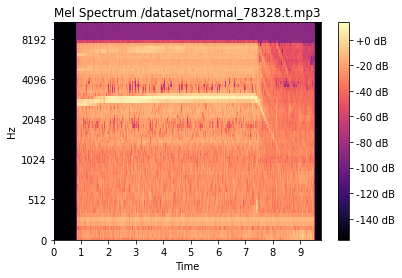

<feature_extractor_type.MEL_SPECTRUM>[{'n_mels': 12, 'n_fft': 128, 'power': 2.0, 'hop_length': 512, 'channel': 0}]wav=/content/MIMII/dataset/normal_78328.t.mp3


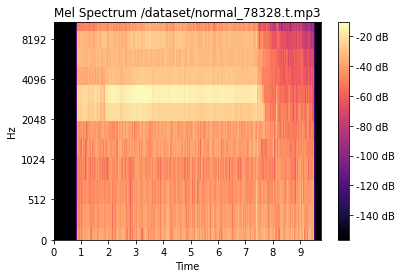

In [6]:
%run -i utility/feature_extractor/JupyterLoad_feature_extractor.py
file_path = file_path = r'/dataset/normal_78328.t.mp3'
## test:
fe_mel = feature_extractor_mel(BASE_FOLDER,'mel1')
print(fe_mel)
fe_mel.create_from_wav(file_path)
print(fe_mel)
fe_mel.plot()
plt.show()
fe_mel.set_hyperparamter(n_mels=12, n_fft=128)
print(fe_mel)
fe_mel.plot()